<a href="https://colab.research.google.com/github/JalpaK88/Projects_SQL/blob/main/SQL_bigquery_crypto_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
from google.cloud import bigquery

# Step 1: Authenticate
auth.authenticate_user()

# Step 2: Prompt user for project ID
PROJECT_ID = input("Enter your GCP project ID: ").strip()

# Check if a project ID was entered
if not PROJECT_ID:
    raise ValueError("You must enter a valid GCP project ID!")

# Step 3: Initialize BigQuery client with the provided project ID
client = bigquery.Client(project=PROJECT_ID)
print("Using project:", client.project)

dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)
table_ref = dataset_ref.table("transactions")
table = client.get_table(table_ref)
rows= client.list_rows(table,max_results=5).to_dataframe()
rows





Enter your GCP project ID: brilliant-flame-471022-p3
Using project: brilliant-flame-471022-p3


,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


In [ ]:
# How many Bitcoin transactions are made per month?

query_with_CTE = """
                 WITH time AS
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions, trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

In [ ]:
# query_job = client.query(query)
query_job = client.query(query_with_CTE)

In [ ]:
num_transaction = query_job.to_dataframe()


In [ ]:
# num_transaction
num_transaction.head()


,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


<Axes: xlabel='trans_date'>

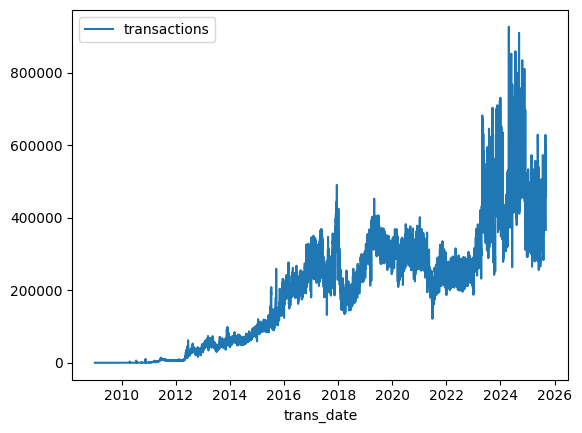

In [ ]:
num_transaction.set_index('trans_date').plot()

